In [36]:
import sys
sys.path.append('../scripts/')
from AudioProcessing.DataUtils import *
from AudioProcessing.AugTools import *
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Augmentation Script Sound Distortion Debugging
## Problem
Once the augmentation scripts were completed we tested them out by performing audio splitting, padding, and resampling for composition of sound and noise. However the output wavforms were incredubly distorted.

## Solution
It turns out when resampling with the librosa DSP library you need to have your data in type float64 before resampling can occur. This is because they require high precision for proper downsampling techniques (decimation then downsample, and upsample then interpolate) with high quialty filters. 

This causes a problem when writing the file to disk for replaying. According to scipy.io's documentation, writing a wavfile with data as certain data types causes the file writer to expect a certain range of values. For example,

(Double Click to see better formatting)
WAV         format	         Min	    Max	   NumPy dtype
32-bit    floating-point	-1.0	   +1.0	    float32
32-bit       PCM	    -2147483648	+2147483647	  int32
16-bit       PCM	       -32768	   +32767	  int16
8-bit        PCM	          0	         255	  uint8

So what well have to do is make sure thayt when we resample we convert back to the original data type before writting to disk. We will also have to be careful to make sure our data is all the same data type before training our models.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

AudioSample Object:
Length in Samples:  80000
Length in Seconds:  4.0
Sample Rate:        20000
DataType: int16


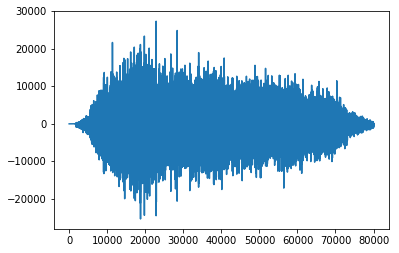

In [39]:
audio_sample = AudioSample('/home/maxwels2/Desktop/Nonspeech/n6.wav')
print(audio_sample)
plt.plot(audio_sample.data)
print('DataType: {}'.format(audio_sample.data.dtype))

In [40]:
# Testing data type theory
wavfile.write('/home/maxwels2/Desktop/non-speech-test/int.wav', 20000, audio_sample.data)

In [41]:
# Need to cast as float64 before resampling, then recast as in16 for file wrtitng
#    -this would be usefule to include in a file writer for audio_sample object
audio_sample.data = audio_sample.data.astype(np.float64)
audio_sample.resample(16000)
print(audio_sample)

AudioSample Object:
Length in Samples:  64000
Length in Seconds:  4.0
Sample Rate:        16000


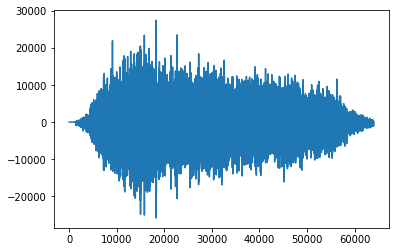

In [42]:
plt.plot(audio_sample.data)

In [43]:
# Testing data type theory
wavfile.write('/home/maxwels2/Desktop/non-speech-test/float.wav', 16000, audio_sample.data) #This clip is super distored
audio_sample.data = audio_sample.data.astype(np.int16)
wavfile.write('/home/maxwels2/Desktop/non-speech-test/float-casted-int16.wav', 16000, audio_sample.data) #this clip is the same as og
# It worked! 